In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt
import seaborn as sns
data = pd.read_csv("Delhi+Delights+Data.csv")
data.head()

,Average Delivery Rating (a1),Average Orders per month (a2),"""Delighted Members"" Purchase"
0,1.5,11,Yes
1,2.5,11,No
2,2.5,11,No
3,3.5,11,No
4,3.5,11,No


In [2]:
data.info()
# we have 5 columns all int type (numerical)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Average Delivery Rating (a1)   30 non-null     float64
 1   Average Orders per month (a2)  30 non-null     int64  
 2   "Delighted Members" Purchase   30 non-null     object 
dtypes: float64(1), int64(1), object(1)
memory usage: 848.0+ bytes


In [3]:
data.describe()
#we can see there is no null value in any of columns

,Average Delivery Rating (a1),Average Orders per month (a2)
count,30.000000,30.000000
mean,3.066667,21.000000
std,1.040004,10.763924
min,1.500000,11.000000
25%,2.500000,13.000000
50%,3.000000,15.000000
75%,3.500000,27.000000
max,4.500000,39.000000


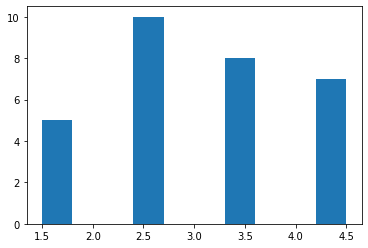

In [4]:
# see how Average Delivery Rating (a1) is distributed
plt.hist(data["Average Delivery Rating (a1)"])
plt.show()

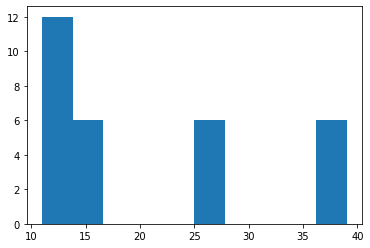

In [5]:
# see how Average Orders per month (a2) is distributed
plt.hist(data["Average Orders per month (a2)"])
plt.show()

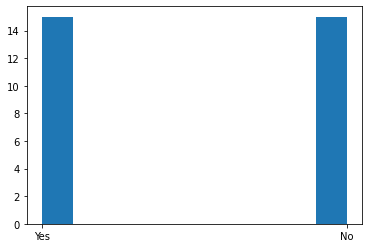

In [9]:
# check how our target variable has it's values
plt.hist(data['"Delighted Members" Purchase'])
plt.show()

In [10]:
# make seperate x and y
x = data.drop('"Delighted Members" Purchase',axis=1)
y = data['"Delighted Members" Purchase'].copy()
x.head()

,Average Delivery Rating (a1),Average Orders per month (a2)
0,1.5,11
1,2.5,11
2,2.5,11
3,3.5,11
4,3.5,11


In [11]:
y.head()

0    Yes
1     No
2     No
3     No
4     No
Name: "Delighted Members" Purchase, dtype: object

# Train test split

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x , y, train_size=.7,random_state=40)
x_train.shape,y_train.shape

((21, 2), (21,))

# Build the decision tree


In [13]:
# now try with default parameters except depth of tree
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

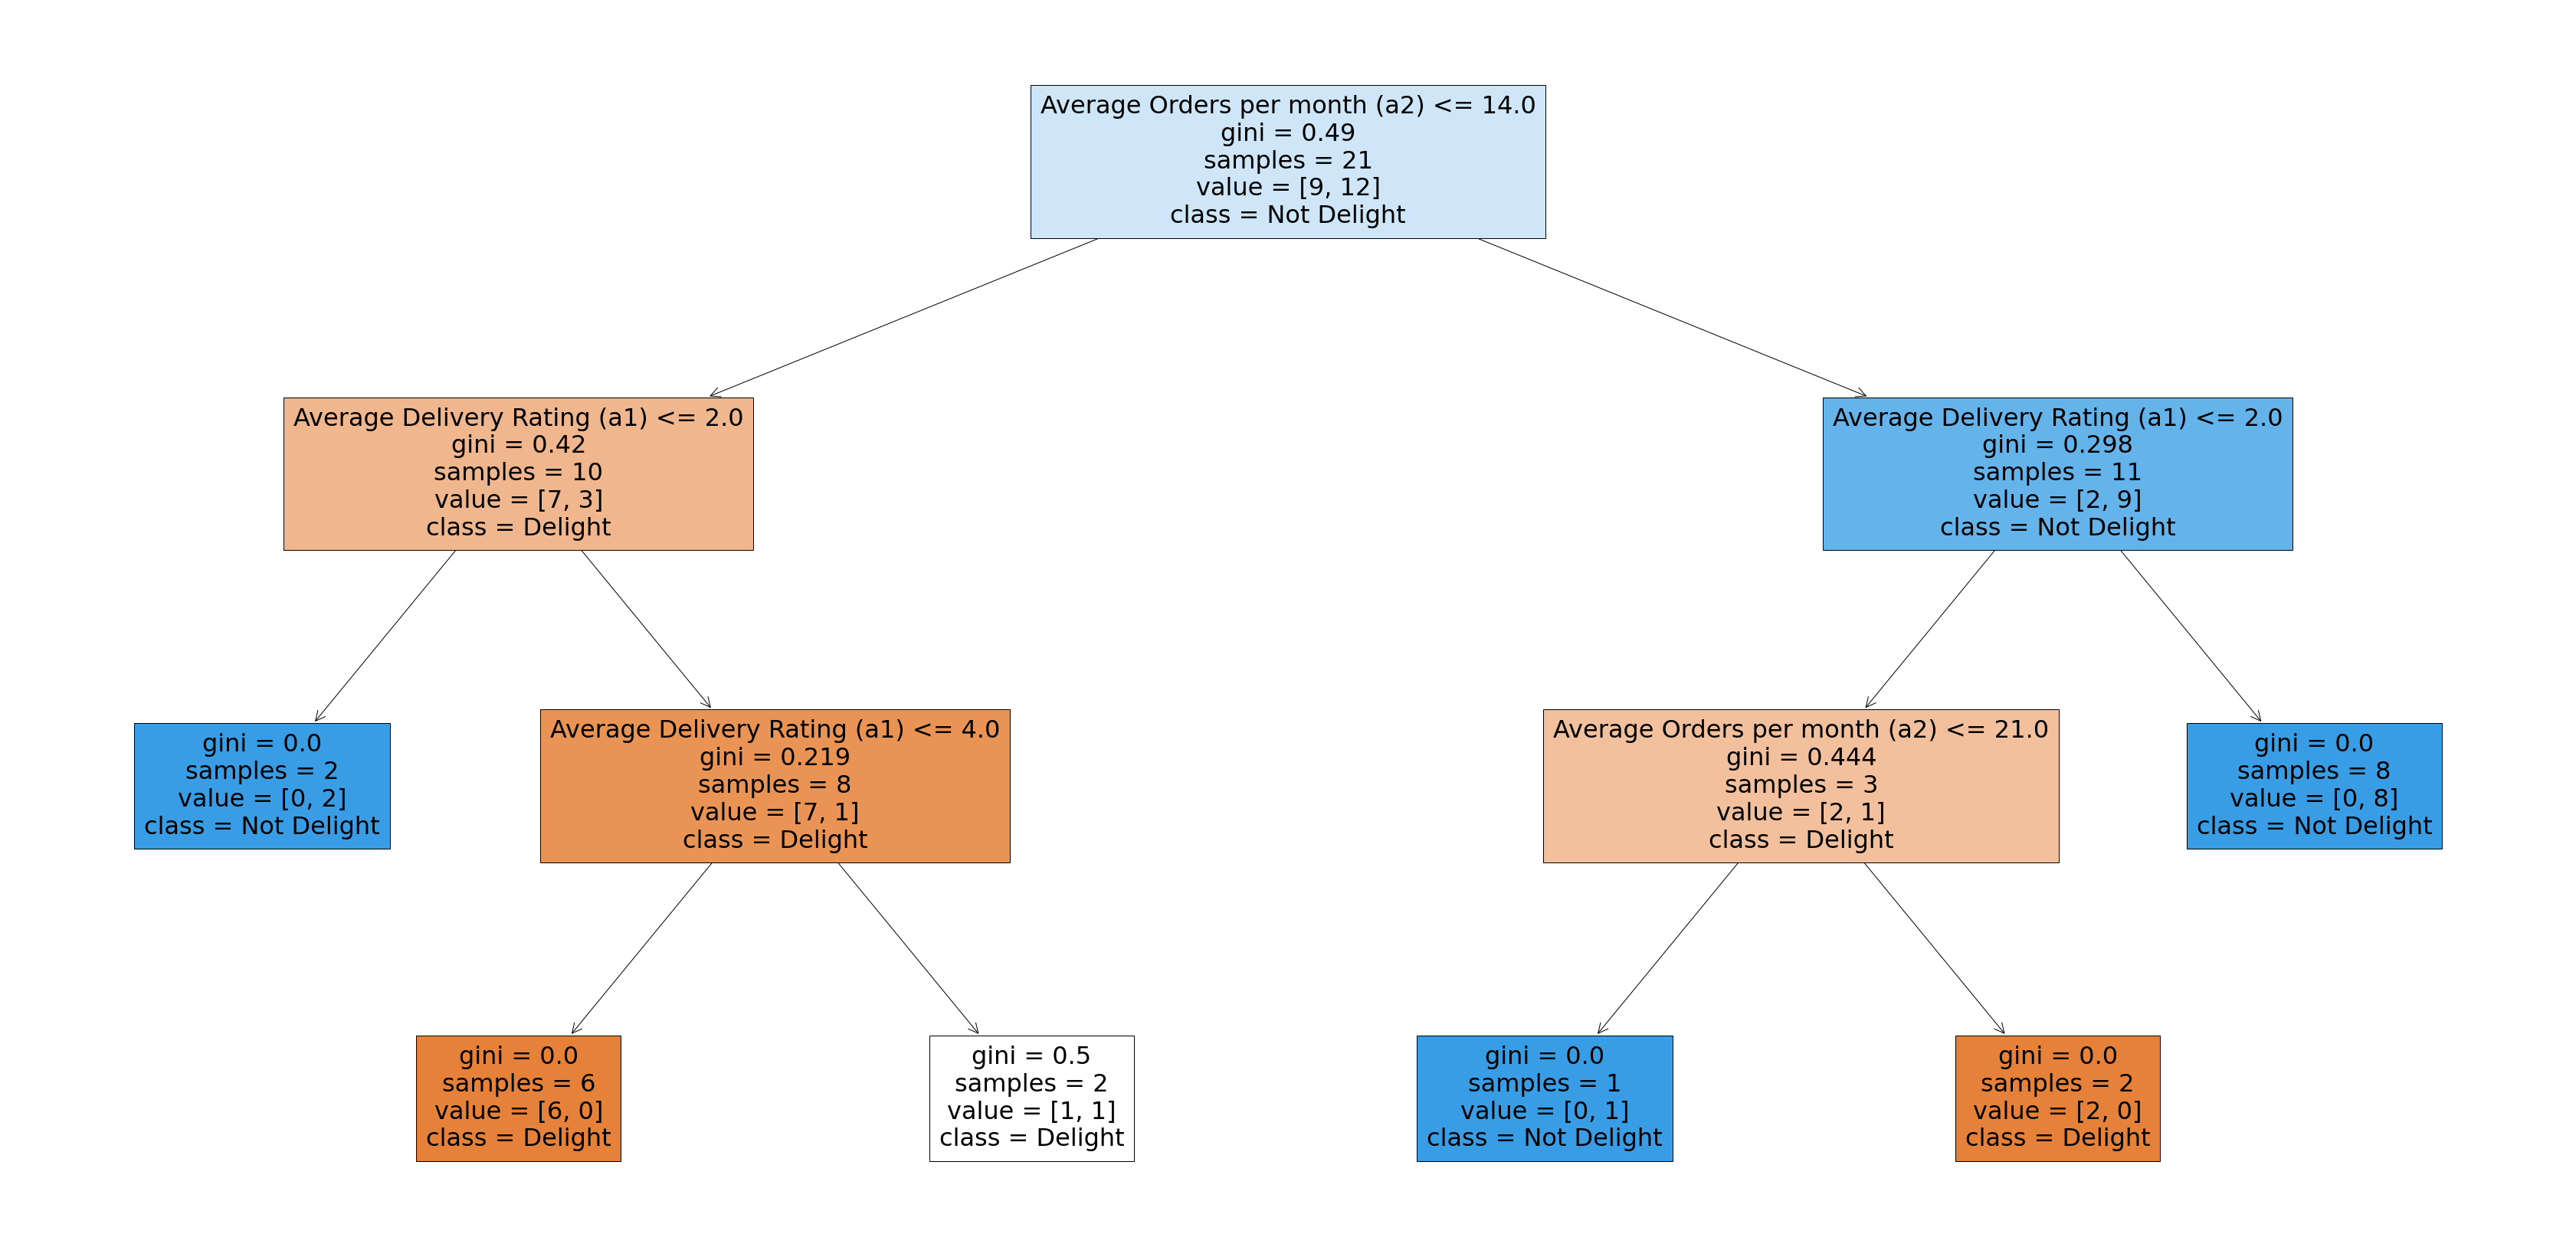

In [15]:
# visulize the decision tree
from sklearn.tree import plot_tree
plt.figure(figsize=(60,30))
plot_tree(dt, feature_names = x.columns, class_names = ["Delight", "Not Delight"], filled = True)
plt.show()

# Evaluate model

In [16]:
# make prediction over both train and test first.
y_train_pred = dt.predict(x_train)
y_test_pred = dt.predict(x_test)

from sklearn.metrics import confusion_matrix, accuracy_score
print(accuracy_score(y_train,y_train_pred))
print(confusion_matrix(y_train,y_train_pred))

print(accuracy_score(y_test,y_test_pred))
print(confusion_matrix(y_test,y_test_pred))

0.9523809523809523
[[ 9  0]
 [ 1 11]]
0.5555555555555556
[[2 4]
 [0 3]]


In [21]:
# now try with default parameters
dt = DecisionTreeClassifier(max_depth=5, min_samples_split=10,min_samples_leaf=5,criterion="gini")
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=10)

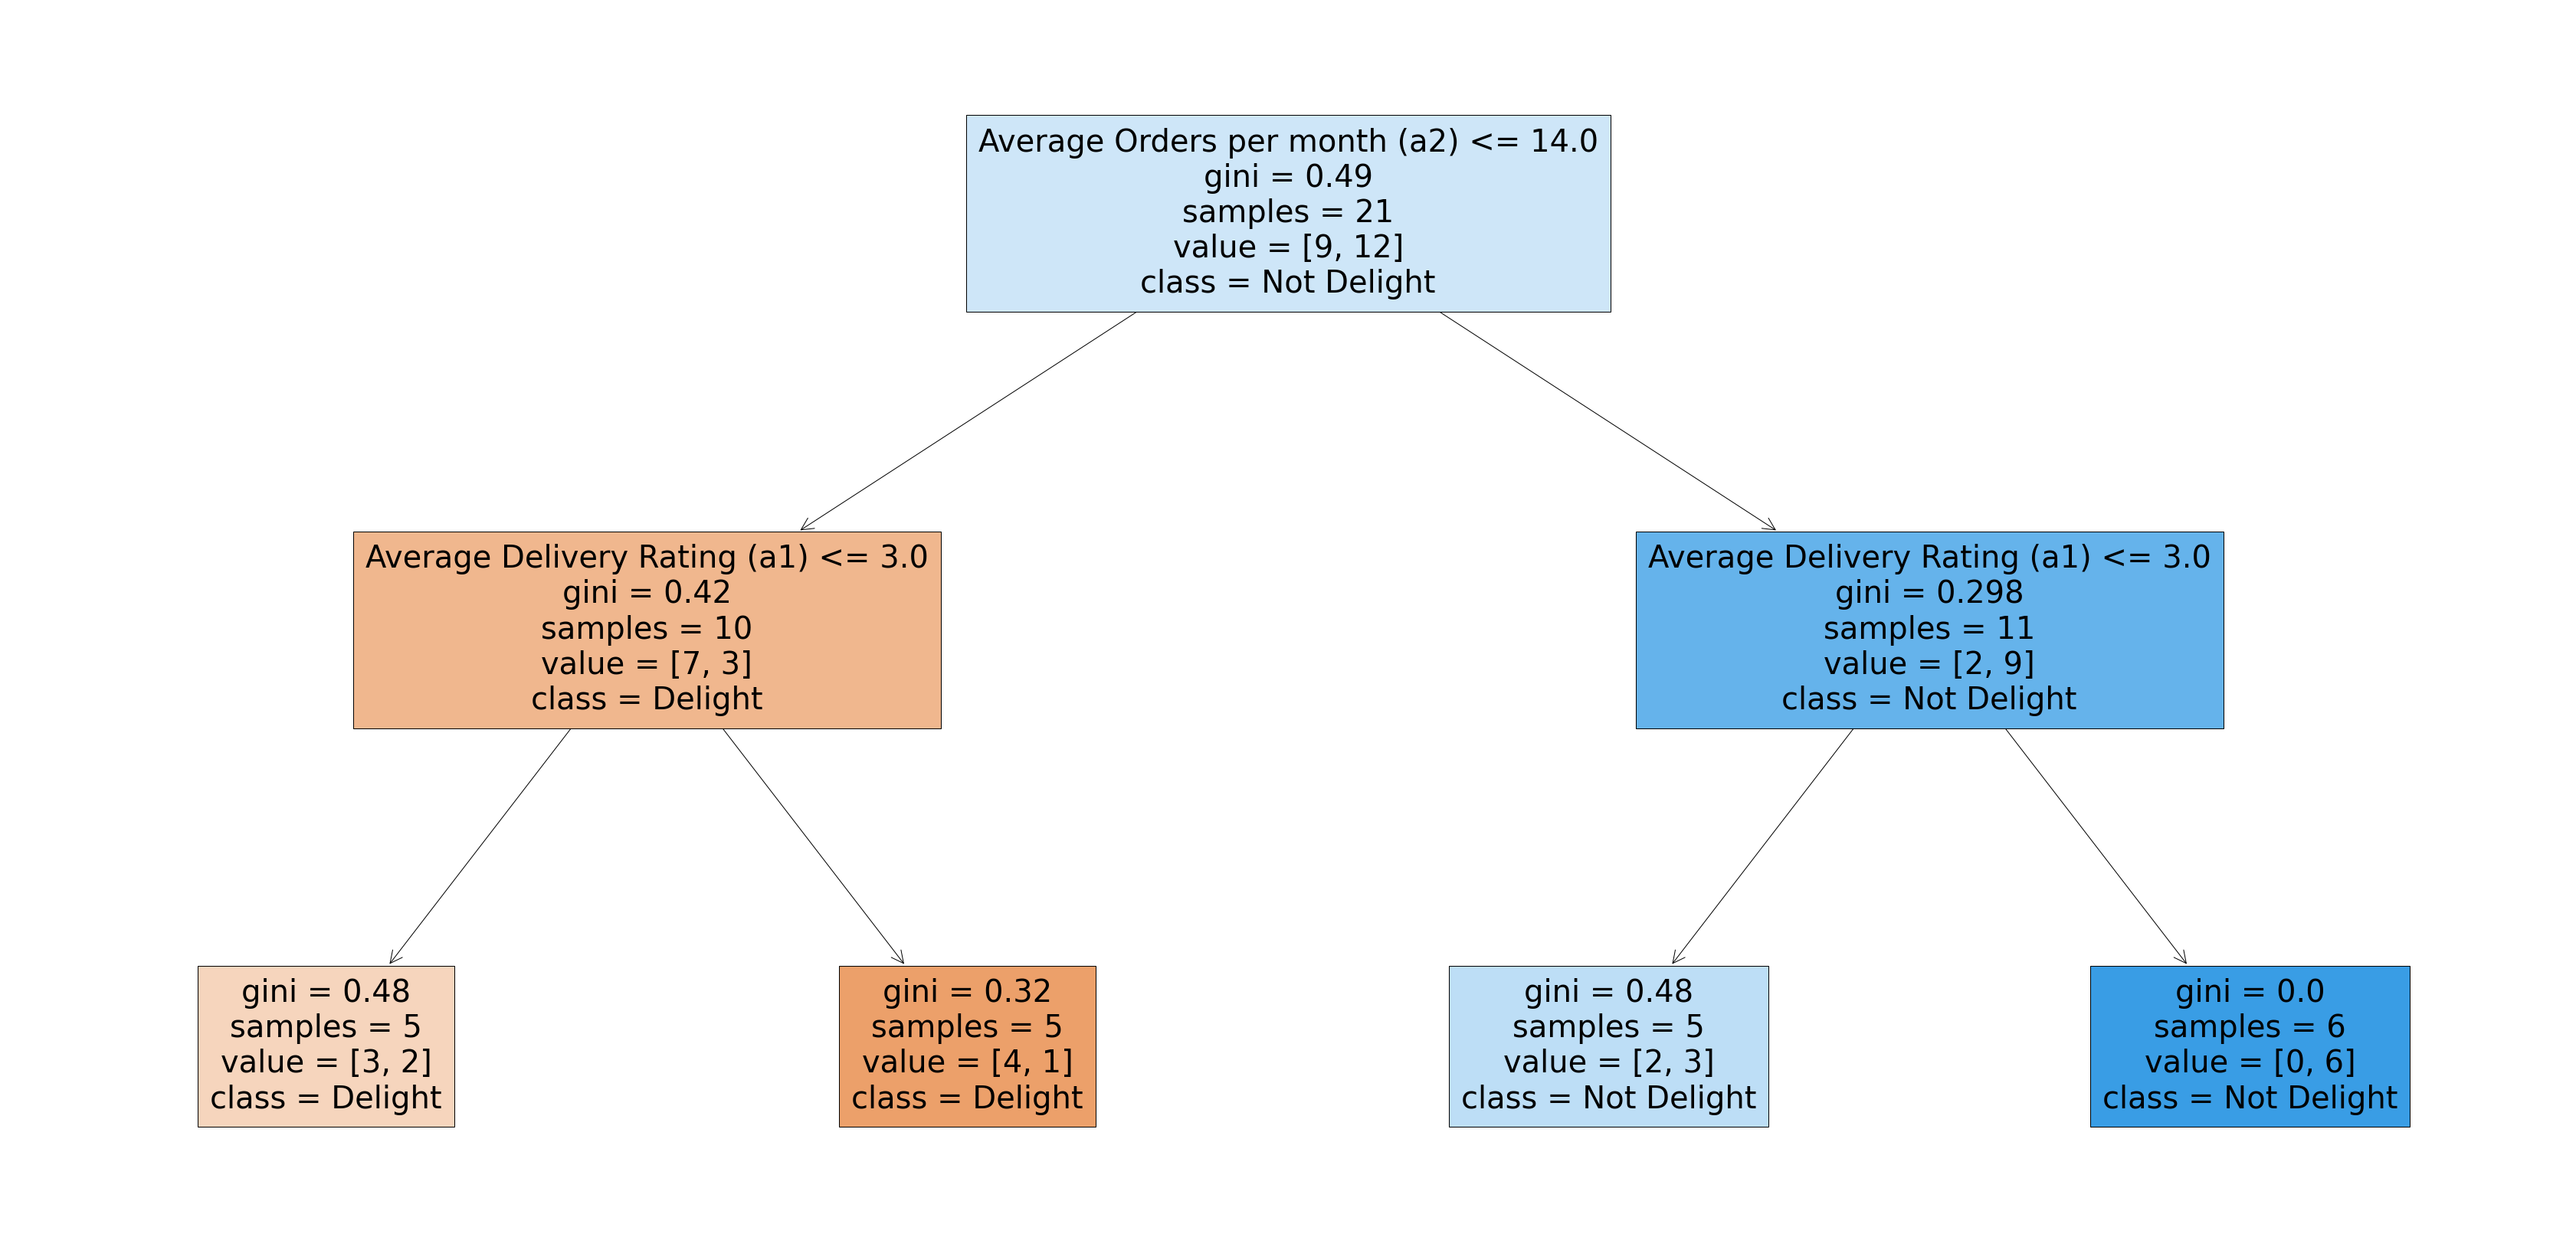

In [22]:
# visulize the decision tree
from sklearn.tree import plot_tree
plt.figure(figsize=(60,30))
plot_tree(dt, feature_names = x.columns, class_names = ["Delight", "Not Delight"], filled = True)
plt.show()

In [23]:
# make prediction over both train and test first.
y_train_pred = dt.predict(x_train)
y_test_pred = dt.predict(x_test)

from sklearn.metrics import confusion_matrix, accuracy_score
print(accuracy_score(y_train,y_train_pred))
print(confusion_matrix(y_train,y_train_pred))

print(accuracy_score(y_test,y_test_pred))
print(confusion_matrix(y_test,y_test_pred))

0.7619047619047619
[[7 2]
 [3 9]]
0.5555555555555556
[[2 4]
 [0 3]]


# hyper parameter tuning using Grid search CV

In [24]:
dt = DecisionTreeClassifier(random_state=42)
from sklearn.model_selection import GridSearchCV
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf' : [5,10,20,50,100],
    'criterion' : ['gini', 'entropy']
}

In [25]:
grid_search = GridSearchCV(estimator=dt,
            param_grid=params,
            cv=4,
            n_jobs=-1,verbose=1,
            scoring="accuracy")

In [26]:
%%time
grid_search.fit(x_train,y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits
CPU times: total: 516 ms
Wall time: 6.2 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [27]:
# take in DF and show
df_search = pd.DataFrame(grid_search.cv_results_)
df_search.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.009412,0.003349,0.002417,0.001984,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",1.0,0.8,0.8,0.4,0.750,0.217945,1
1,0.008778,0.001570,0.001903,0.001903,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.5,0.6,0.6,0.6,0.575,0.043301,11
2,0.014715,0.004694,0.005051,0.004039,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.5,0.6,0.6,0.6,0.575,0.043301,11
3,0.010960,0.004238,0.002345,0.001489,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.5,0.6,0.6,0.6,0.575,0.043301,11
4,0.004933,0.002407,0.005852,0.001833,gini,2,100,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.5,0.6,0.6,0.6,0.575,0.043301,11


In [28]:
print(len(df_search))
df_search.sort_values(by = "rank_test_score").head()
# rank_test_score =1 we get .68 == 68% as mean score on params entropy, depth = 10 and leaf = 5

50


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.009412,0.003349,0.002417,0.001984,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",1.0,0.8,0.8,0.4,0.75,0.217945,1
45,0.005811,0.003083,0.002851,0.002693,entropy,20,5,"{'criterion': 'entropy', 'max_depth': 20, 'min...",1.0,0.8,0.8,0.4,0.75,0.217945,1
30,0.006626,0.008163,0.002470,0.004277,entropy,3,5,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",1.0,0.8,0.8,0.4,0.75,0.217945,1
5,0.005780,0.000636,0.003122,0.001459,gini,3,5,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",1.0,0.8,0.8,0.4,0.75,0.217945,1
20,0.004194,0.003552,0.001193,0.002066,gini,20,5,"{'criterion': 'gini', 'max_depth': 20, 'min_sa...",1.0,0.8,0.8,0.4,0.75,0.217945,1


In [29]:
# best params
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 5}

In [30]:
# best score (mean)
grid_search.best_score_

0.75

In [31]:
dt_best = grid_search.best_estimator_

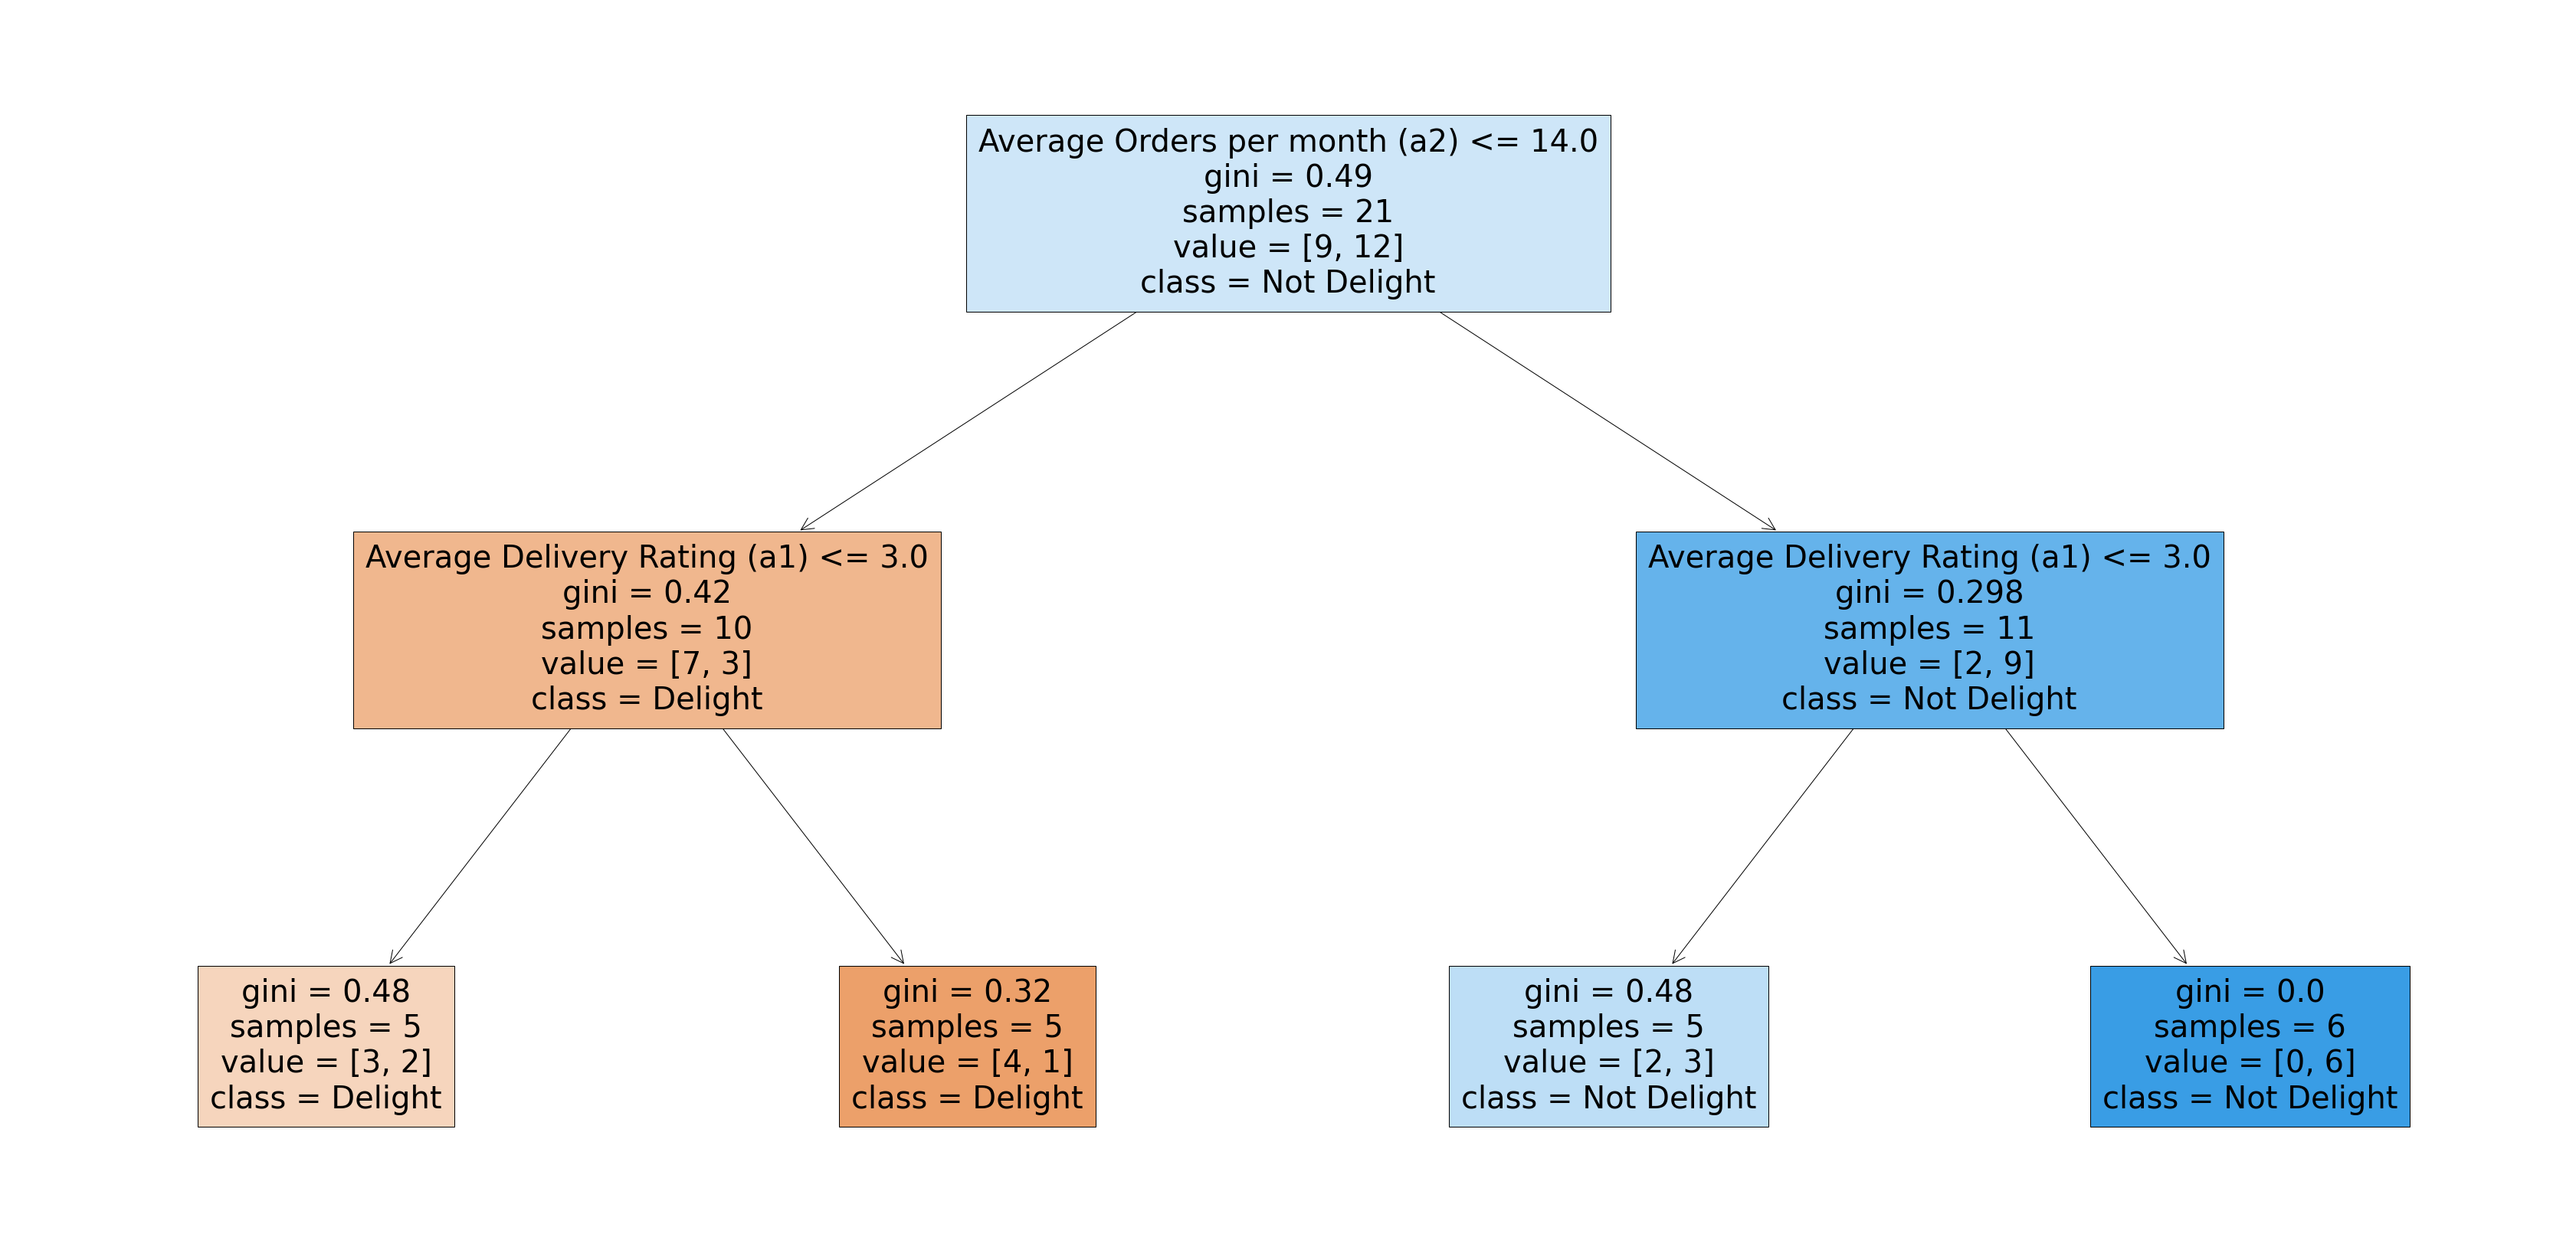

In [33]:
# visulize the decision tree on these best score
from sklearn.tree import plot_tree
plt.figure(figsize=(60,30))
plot_tree(dt_best, feature_names = x.columns, class_names = ["Delight", "Not Delight"], filled = True)
plt.show()

In [34]:
# make prediction over both train and test first.
y_train_pred = dt_best.predict(x_train)
y_test_pred = dt_best.predict(x_test)

from sklearn.metrics import confusion_matrix, accuracy_score
print(accuracy_score(y_train,y_train_pred))
print(confusion_matrix(y_train,y_train_pred))
# getting 100% accuracy on train set

print(accuracy_score(y_test,y_test_pred))
print(confusion_matrix(y_test,y_test_pred))
# getting 62% accuracy on test set, which got down to train set

0.7619047619047619
[[7 2]
 [3 9]]
0.5555555555555556
[[2 4]
 [0 3]]


In [35]:
# again on train we are getting 83% accuracy whereas on test 60% accuracy.
#which is not that bad as compare to trail on limited combinations.

In [36]:
# look at classification report
from sklearn.metrics import classification_report, roc_curve,auc,roc_auc_score
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

          No       1.00      0.33      0.50         6
         Yes       0.43      1.00      0.60         3

    accuracy                           0.56         9
   macro avg       0.71      0.67      0.55         9
weighted avg       0.81      0.56      0.53         9



In [ ]:
# key things
# min_samples_split : is minimum number of data samples required to split an internal node
# min_samples_leaf : is minimum number of samples required to be at leaf node.
# max_depth of tree is hight of tree.
# if model is overfit then increase min_samples_split and decrease tree depth.
# if min_samples_split increase then max_depth will dicrease. (since we are taking more data samples to split.)